# Coding Logistic Regression From Scratch - Lab

## Introduction

In this lab, you'll practice your ability to translate mathematical algorithms into python functions. This will deepen and solidify your understanding of the logistic regression!

## Objectives

You will be able to:
* Understand and implement logistic regression

## Overview

Recall that the logistic regression algorithm builds upon the intuition from linear regression. In logistic regression, you start by taking the input data, X and multiplying it by a vector of weights for each of the individual features, which produces an output y. Afterwards you'll work on using an iterative approach via gradient descent to tune these weights.

## Linear Regression Setup

Write a simple function `predict_y` that takes in a matrix `X` of observations and a vector of feature weights `w` and outputs a vector of predictions for the various observations.

Recall that this is the sum of the product of each of the feature observations and their corresponding feature weights:  
  
$\large \hat{y}_i = X_{i1} \cdot w_1 + X_{i2} \cdot w_2 + X_{i3} \cdot w_3 + ... + X_{in} \cdot w_n$

> **Hint**: Think about which mathematical operation you've seen previously that will take a matrix (X) and multiply it by a vector of weights (w).

In [1]:
import numpy as np

In [2]:
def predict_y(X, w):
    """
    x : matrix of observations
    w : vector of feature weights
    --------------------------
    Returns a vector of predictions for the various observations
    """
    return X.dot(w)

## The Sigmoid Function

Recall that the sigmoid function is used to map the linear regression model output to a range of 0 to 1, satisfying basic premises of probability. As a reminder, the sigmoid function is defined by:  
  
$S(x) = \dfrac{1}{1+e^(-x)}$   
  
Write this as a python function where x is the input and the function outputs the result of the sigmoid function.

In [3]:
def sigmoid(X):
    s_x = 1 / (1 + np.e**(-1*X))
    return s_x

## Graphing the Sigmoid

For good measure, let's do a brief investigation of your new function.   
Graph the output of your sigmoid function using 10,000 X values evenly spaced from -20 to 20.

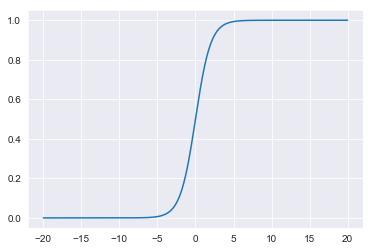

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

x = np.linspace(-20, 20, 10000)
plt.plot(x, sigmoid(x));

## Gradient Descent with the Sigmoid Function

Recall that gradient descent is a numerical method for finding a minimum to a cost function. In the case of logistic regression, you are looking to minimize the error between the model's predictions and the actual data labels. To do this, you first calculate an error vector based on the current model's feature weights. You then multiply the transpose of the training matrix itself by this error vector in order to obtain the gradient. Finally, you take the gradient, multiply it by the step size and add this to our current weight vector to update it. Below, write such a function. It will take 5 inputs:  
* X
* y
* max_iterations
* alpha (the step size)
* initial_weights  
By default, have your function set the initial_weights parameter to a vector where all feature weights are set to 1.

In [5]:
def grad_desc(X, y, max_iterations=1000, alpha=.001, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        y_hat = sigmoid(X.dot(weights))
        
        # Calculate an error vector based on these initial predictions and the correct labels
        errors = y - y_hat
        
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution 
        # for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(), errors) 
        
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    return weights, weights_col

## Running Your Algorithm

Now that you've coded everything from the ground up, you can further investigate the convergence behavior of the gradient descent algorithm. Remember that gradient descent does not guarantee a global minimum, only a local minimum, and that small deviations in the starting point or step size can lead to different outputs.  
  
Run your algorithm and plot the successive weights of the features through iterations. Below is a dataset, with X and y predefined for you. Use your logistic regression function to train a model. As the model trains, record the iteration cycle of the gradient descent algorithm and the weights of the various features. Then, plot this data on subplots for each of the individual features. Each graph should have the iteration number on the x-axis and the value of that feature weight for that iteration cycle on the y-axis. This will visually display how the algorithm is adjusting the weights over successive iterations, and hopefully show convergence to stable weights.

In [6]:
import pandas as pd
df = pd.read_csv('heart.csv')
X = df[df.columns[:-1]]
y = df.target
print(y.value_counts())
X.head()

1.0    165
0.0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [7]:
weights, weight_col = grad_desc(X, y, max_iterations=10000, alpha=0.001)

In [18]:
weight_col.columns = np.arange(len(weight_col.columns))

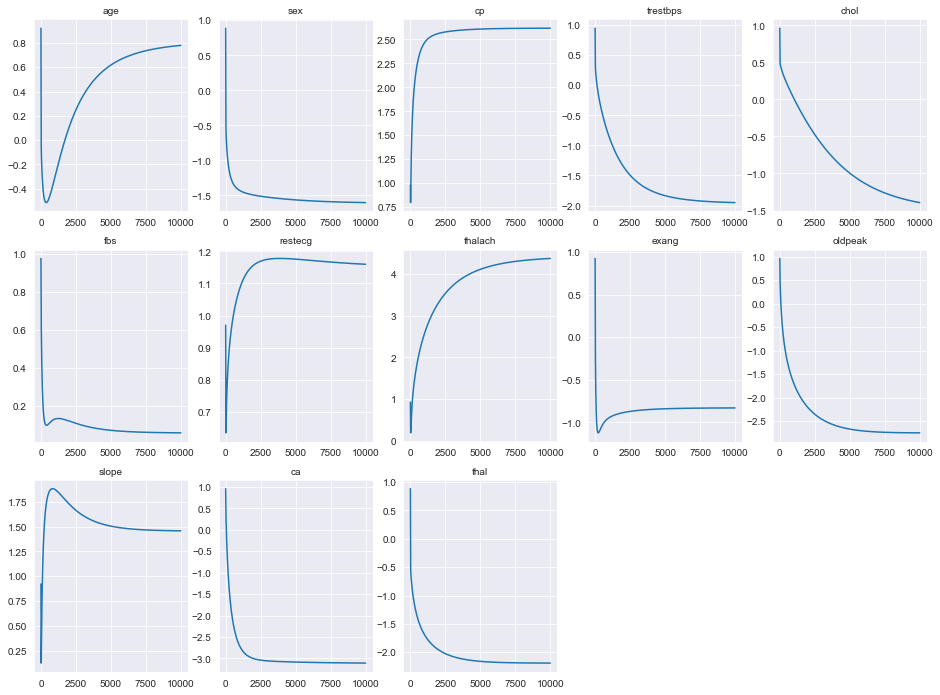

In [19]:
plt.figure(figsize=(16,12))

for (i, j) in enumerate(weights):
    plt.subplot(3, 5, i + 1)
    plt.title(list(X)[i], size='medium')
    plt.plot(weight_col.iloc[i].T)
    plt.axis('tight')

## sci-kit learn

For comparison, import sci-kit learn's standard LogisticRegression function. Initialize a regression object with **no intercept** and with **C=1e16** or another very high number. The reason is as follows: our implementation has not used an intercept, and you have not performed any regularization such as Lasso or Ridge (sci-kit learn uses l2 by default). The high value of C will essentially negate this.

After initializing a regression object, fit it to X and y.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression(fit_intercept = False, C = 1e16)

In [22]:
model_log = logreg.fit(X,y)
model_log

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Compare the models

Compare the coefficient weights of your model to that generated by sci-kit learn.

In [23]:
print("Coefficient Differences (sklearn - weights):\n",model_log.coef_ - weights)

Coefficient Differences (sklearn - weights):
 [[ 0.03193687 -0.01127193  0.00022952 -0.01692408 -0.11585877 -0.0013053
  -0.00764588  0.05173623  0.00108069  0.00394831 -0.00198536 -0.00763642
   0.00027677]]


## Level - Up

Update the gradient descent algorithm to also return the prediction error after each iteration. Then rerun the algorithm and create a graph displaying the prediction errors versus the iteration number.

In [26]:
def grad_desc(X, y, max_iterations=10000, alpha=.001, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    error_list = []
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        y_hat = sigmoid(X.dot(weights))
        
        # Calculate an error vector based on these initial predictions and the correct labels
        errors = y - y_hat
        
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution 
        # for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(), errors) 
        
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
        error_list.append(np.abs(errors).sum())
    return weights, weights_col, errors, error_list

In [27]:
weights, weight_col, errors, error_list = grad_desc(X, y, max_iterations=10000, alpha=0.001)

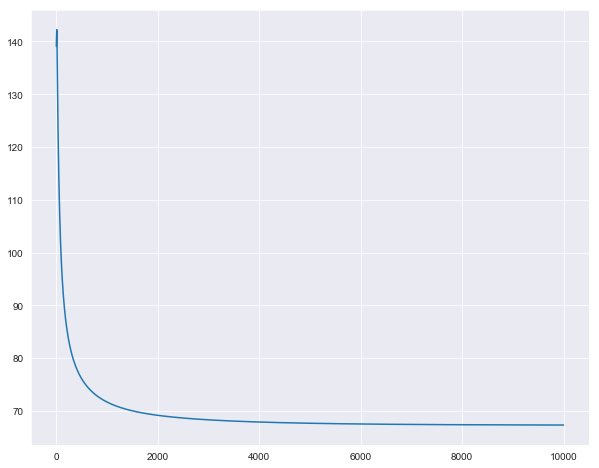

In [29]:
plt.figure(figsize=(10,8))

plt.plot(range(10000), error_list);

## Additional Resources

If you want to see more of the mathematics behind the gradient derivation above, check out section 4.4.1 from the Elements of Statistical Learning which can be found here: https://web.stanford.edu/~hastie/ElemStatLearn//.

## Summary

Congratulations! You just coded logistic regression from the ground up using NumPy! With this, you should have a fairly deep understanding of logistic regression and how the algorithm works! In the upcoming labs, you'll continue to explore this from a few more angles, plotting our data along with the decision boundary for our predictions.